In [ ]:
 # 1. Data Handling
import pandas as pd

 # 2️⃣ Visualization (Optional but useful for EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# 3️⃣ Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 4️⃣ Data Splitting
from sklearn.model_selection import train_test_split

# 5️⃣ Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 6️⃣ Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
df=pd.read_csv('/content/Lightweight and ultra-lightweight cryptographic algorithms - Sheet2 (6).csv')

In [ ]:
df

,RAM_MB,CPU_MHz,Battery_Level_%,Latency_ms,Packet_Loss_%,Threat_Level,Protocol_Category,Use_Case,Recommended_Protocol
0,512,64,49.46,212.11,8.21,0,Hybrid,Router,AES-128
1,512,64,30.03,112.70,0.34,1,Hybrid,SmartGrid,AES-128
2,512,8,65.64,96.41,6.04,1,Hybrid,SmartGrid,AES-128
3,128,32,83.86,294.33,1.43,2,Hybrid,Military,AES-128
4,256,100,87.68,35.87,9.76,1,Hybrid,SmartGrid,AES-128
...,...,...,...,...,...,...,...,...,...
995,128,32,29.31,168.76,5.36,0,Hybrid,Router,AES-128
996,512,32,88.04,263.55,7.26,0,Hybrid,Router,AES-128
997,256,64,73.74,198.16,3.00,2,Hybrid,Military,AES-128
998,512,64,56.20,62.86,2.20,2,Hybrid,Military,AES-128


In [ ]:
df.shape

(1000, 9)

In [ ]:
df.columns

Index(['RAM_MB', 'CPU_MHz', 'Battery_Level_%', 'Latency_ms', 'Packet_Loss_%',
       'Threat_Level', 'Protocol_Category', 'Use_Case',
       'Recommended_Protocol'],
      dtype='object')

In [ ]:
df.head()


,RAM_MB,CPU_MHz,Battery_Level_%,Latency_ms,Packet_Loss_%,Threat_Level,Protocol_Category,Use_Case,Recommended_Protocol
0,512,64,49.46,212.11,8.21,0,Hybrid,Router,AES-128
1,512,64,30.03,112.70,0.34,1,Hybrid,SmartGrid,AES-128
2,512,8,65.64,96.41,6.04,1,Hybrid,SmartGrid,AES-128
3,128,32,83.86,294.33,1.43,2,Hybrid,Military,AES-128
4,256,100,87.68,35.87,9.76,1,Hybrid,SmartGrid,AES-128


In [ ]:
df.tail()

,RAM_MB,CPU_MHz,Battery_Level_%,Latency_ms,Packet_Loss_%,Threat_Level,Protocol_Category,Use_Case,Recommended_Protocol
995,128,32,29.31,168.76,5.36,0,Hybrid,Router,AES-128
996,512,32,88.04,263.55,7.26,0,Hybrid,Router,AES-128
997,256,64,73.74,198.16,3.00,2,Hybrid,Military,AES-128
998,512,64,56.20,62.86,2.20,2,Hybrid,Military,AES-128
999,128,64,48.11,143.43,4.24,1,Hybrid,SmartGrid,AES-128


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RAM_MB                1000 non-null   int64  
 1   CPU_MHz               1000 non-null   int64  
 2   Battery_Level_%       1000 non-null   float64
 3   Latency_ms            1000 non-null   float64
 4   Packet_Loss_%         1000 non-null   float64
 5   Threat_Level          1000 non-null   int64  
 6   Protocol_Category     1000 non-null   object 
 7   Use_Case              1000 non-null   object 
 8   Recommended_Protocol  1000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB


In [ ]:
df.describe()

,RAM_MB,CPU_MHz,Battery_Level_%,Latency_ms,Packet_Loss_%,Threat_Level
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,251.520000,41.120000,54.996950,150.21195,5.127900,0.890000
std,173.065425,32.108824,25.889525,81.30604,2.759165,0.726931
min,64.000000,8.000000,10.470000,10.75000,0.030000,0.000000
25%,128.000000,8.000000,32.515000,83.25750,2.925000,0.000000
50%,256.000000,32.000000,54.890000,149.26000,5.330000,1.000000
75%,512.000000,64.000000,75.970000,219.35750,7.445000,1.000000
max,512.000000,100.000000,99.630000,298.79000,9.980000,2.000000


In [ ]:
df.duplicated().sum()

np.int64(800)

In [ ]:
df.isnull().sum()

,0
RAM_MB,0
CPU_MHz,0
Battery_Level_%,0
Latency_ms,0
Packet_Loss_%,0
Threat_Level,0
Protocol_Category,0
Use_Case,0
Recommended_Protocol,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

# **Data Preprocessing**

In [ ]:
# LabelEncoder
Le=LabelEncoder()
df['protocol_label']=Le.fit_transform(df['Recommended_Protocol'])
df.head()

,RAM_MB,CPU_MHz,Battery_Level_%,Latency_ms,Packet_Loss_%,Threat_Level,Protocol_Category,Use_Case,Recommended_Protocol,protocol_label
0,512,64,49.46,212.11,8.21,0,Hybrid,Router,AES-128,0
1,512,64,30.03,112.70,0.34,1,Hybrid,SmartGrid,AES-128,0
2,512,8,65.64,96.41,6.04,1,Hybrid,SmartGrid,AES-128,0
3,128,32,83.86,294.33,1.43,2,Hybrid,Military,AES-128,0
4,256,100,87.68,35.87,9.76,1,Hybrid,SmartGrid,AES-128,0


In [ ]:
# Feature Selection

x=df[['RAM_MB','CPU_MHz','Battery_Level_%','Latency_ms','Packet_Loss_%','Threat_Level']]
y=df['protocol_label']
df.head()

,RAM_MB,CPU_MHz,Battery_Level_%,Latency_ms,Packet_Loss_%,Threat_Level,Protocol_Category,Use_Case,Recommended_Protocol,protocol_label
0,512,64,49.46,212.11,8.21,0,Hybrid,Router,AES-128,0
1,512,64,30.03,112.70,0.34,1,Hybrid,SmartGrid,AES-128,0
2,512,8,65.64,96.41,6.04,1,Hybrid,SmartGrid,AES-128,0
3,128,32,83.86,294.33,1.43,2,Hybrid,Military,AES-128,0
4,256,100,87.68,35.87,9.76,1,Hybrid,SmartGrid,AES-128,0


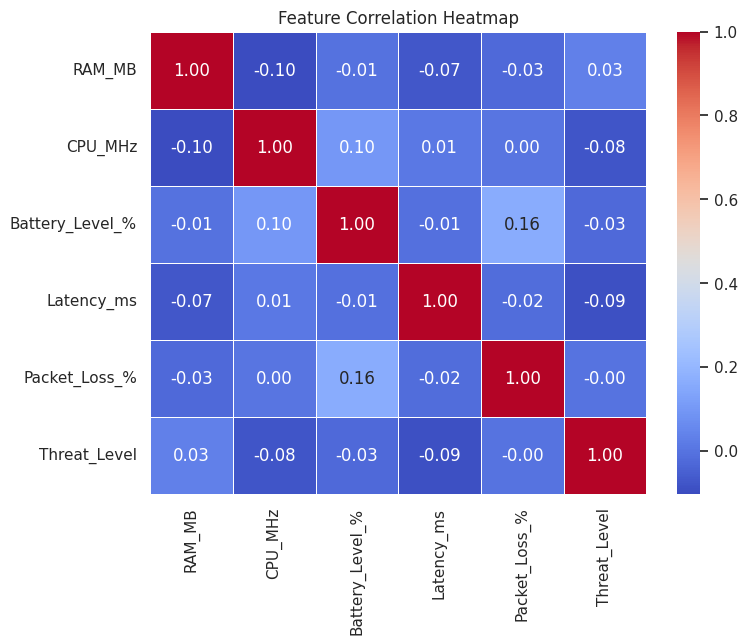

In [ ]:
# Select the features

x = df[['RAM_MB','CPU_MHz','Battery_Level_%','Latency_ms','Packet_Loss_%','Threat_Level']]

# Compute the correlation matrix
corr_matrix = x.corr()

# Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


## **Feature Correlation Heatmap:**-

✅ Insight:

* Most features show very weak correlations with each other (values close to 0), indicating that they are largely independent.

* RAM_MB and CPU_MHz have a small negative correlation (−0.10), suggesting devices with higher RAM may slightly tend to have lower CPU frequencies.

* Battery_Level_% has a weak positive correlation with Packet_Loss_% (+0.16), which may or may not be meaningful depending on context.

* Threat_Level is weakly and negatively correlated with Latency_ms and CPU_MHz, but the values are too small (−0.09, −0.08) to indicate any strong linear relationship.

 **Overall:** - There are no strong multicollinearities among the numerical features, which is good for machine learning models like linear regression and tree-based algorithms. Each feature likely provides unique information.

In [ ]:
# Scaling

scaler=StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
df

,RAM_MB,CPU_MHz,Battery_Level_%,Latency_ms,Packet_Loss_%,Threat_Level,Protocol_Category,Use_Case,Recommended_Protocol,protocol_label
0,512,64,49.46,212.11,8.21,0,Hybrid,Router,AES-128,0
1,512,64,30.03,112.70,0.34,1,Hybrid,SmartGrid,AES-128,0
2,512,8,65.64,96.41,6.04,1,Hybrid,SmartGrid,AES-128,0
3,128,32,83.86,294.33,1.43,2,Hybrid,Military,AES-128,0
4,256,100,87.68,35.87,9.76,1,Hybrid,SmartGrid,AES-128,0
...,...,...,...,...,...,...,...,...,...,...
195,64,100,40.77,274.82,6.34,0,Hybrid,Router,AES-128,0
196,64,32,61.43,270.90,8.37,0,Hybrid,Router,AES-128,0
197,128,8,94.30,110.75,5.99,0,Ultra-Lightweight,Sensor,SPECK,4
198,256,8,26.59,264.23,6.06,0,Lightweight,HomeAuto,SIMON,3


# VISUALIZATIONS

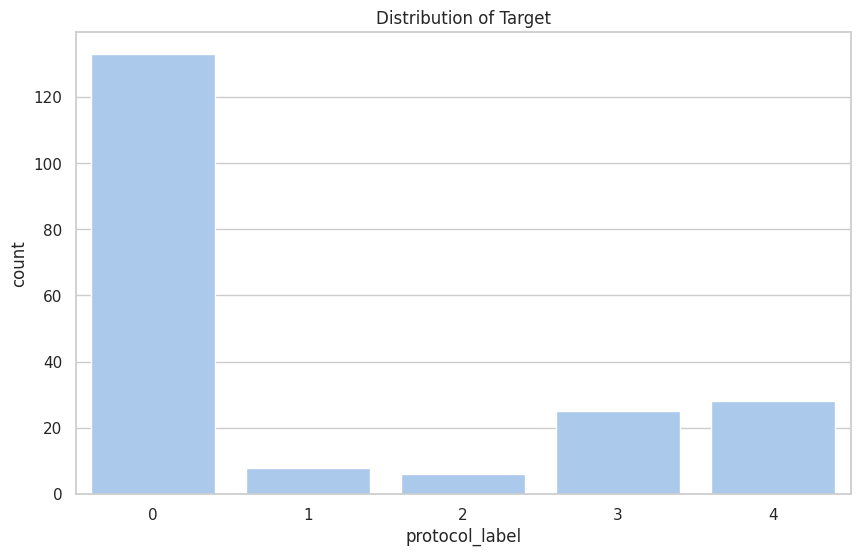

In [ ]:
# Univariate Analysis

# A. Target Variable Distribution


sns.countplot(x='protocol_label', data=df)  # replace with actual target column
plt.title("Distribution of Target")
plt.show()

# **1. Target Variable Distribution (graph )**

## ✅ **Insight**:

* ### ***The target variable protocol_label is highly imbalanced, with class 0 dominating the dataset***.
* ### ***This imbalance may bias the model toward predicting class 0 more often, potentially reducing accuracy for minority classes.***
* ### ***Consider applying resampling techniques (e.g., SMOTE or class weights) to improve model fairness.***

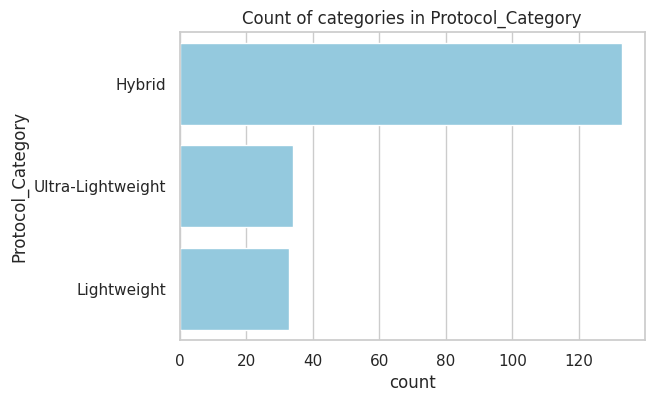

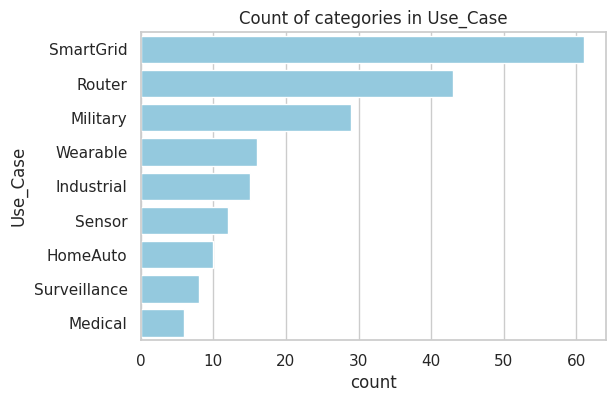

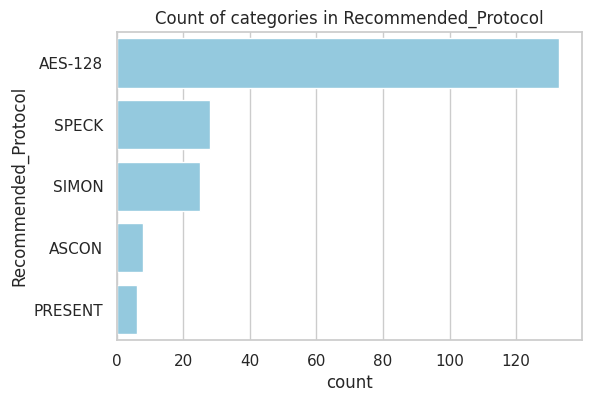

In [ ]:
# B . Countplot Code for Categorical Columns

categorical_cols = ['Protocol_Category', 'Use_Case', 'Recommended_Protocol']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=col, data=df,color='skyblue' , order=df[col].value_counts().index)
    plt.title(f"Count of categories in {col}")
    plt.show()

# 2. **Bar Charts – Key Insights**

# **1.Protocol Category Dominance** :-


* Hybrid protocols are overwhelmingly the most common (>100 instances), significantly outpacing Lightweight (~ 60) and Ultra-Lightweight (~20) protocols.

### **Insight**: *This suggests a strong preference for hybrid approaches, likely due to their enhanced flexibility and security benefits over purely lightweight designs*..
---
# **2.Primary Use Cases** :-

* Sensor applications are the most frequent (~ 55 – 60), followed by Industrial ( 40) and Home Automation (~ 35).
Router and Smart Grid show moderate representation (~20–25), while Military, Wearable, Surveillance, and especially Medical applications are underrepresented (<15).

### **Insight**: *The focus of cryptographic protocol research and implementation appears heavily skewed toward IoT use cases, particularly sensing, industrial control, and home automation. Security-critical domains like Military and Medical are less explored, indicating a gap or emerging opportunity*.
---
# **3. Recommended Protocol Hegemony** :-

* AES-128 dominates recommendations(~ 120), far surpassing all other options.
SPECK and SIMON follow at a distance(~ 35 – 40), with ASCON and PRESENT trailing (~ 15–20).

### **Insight**: *AES-128 remains the de facto standard due to its widespread trust and performance. Lightweight alternatives like SPECK and SIMON have some traction, while ASCON and PRESENT are still emerging or niche in adoption*.
---




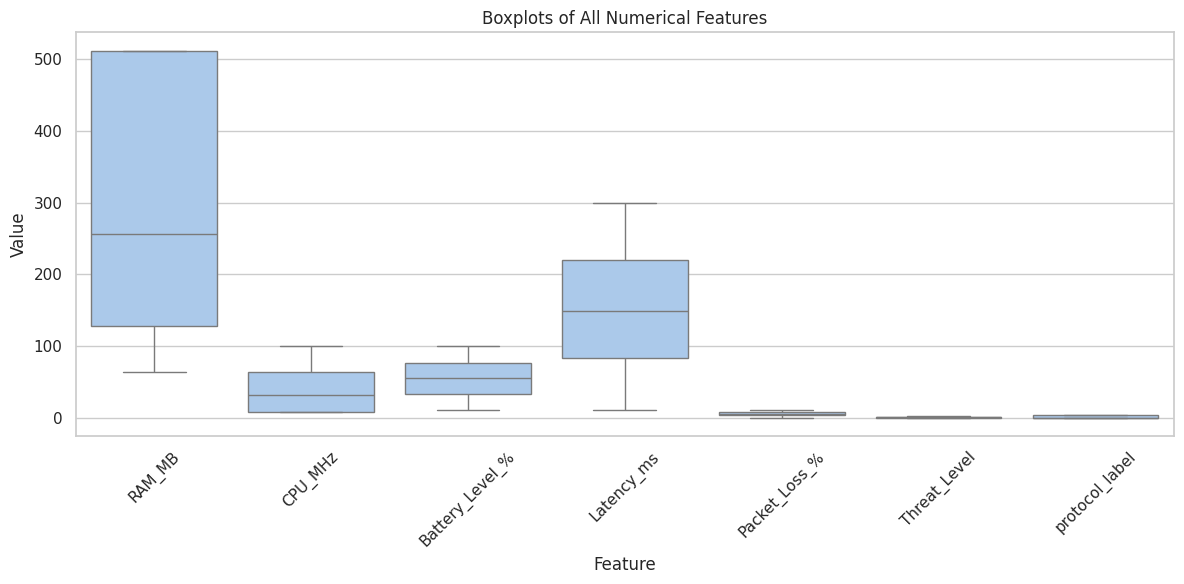

In [ ]:
# c. Boxplots of All Numerical Features (Combined View)

# Melt the DataFrame to long format
melted_df = df[numerical_cols].melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Feature', y='Value', data=melted_df)
plt.title("Boxplots of All Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **3. Boxplots of All Numerical Features:**

*  boxplots to highlight spread and outliers.

✅ Insight:

* *RAM_MB and Latency_ms -  have the widest spread, indicating high variability across devices and potential performance differences*

* CPU_MHz and Battery_Level_% - show moderate variation, with values grouped more closely, suggesting more standardized configurations.

* Packet_Loss_% and Threat_Level -  are tightly clustered with minimal spread, showing low variance and consistent behavior across samples.

* Outliers are present in RAM_MB and Latency_ms, -  which may impact model performance and should be reviewed for potential cleaning or transformation.

 ***Overall*** : This boxplot highlights which features have diverse values and which are more consistent—helpful for scaling decisions, outlier handling, and feature selection.
  

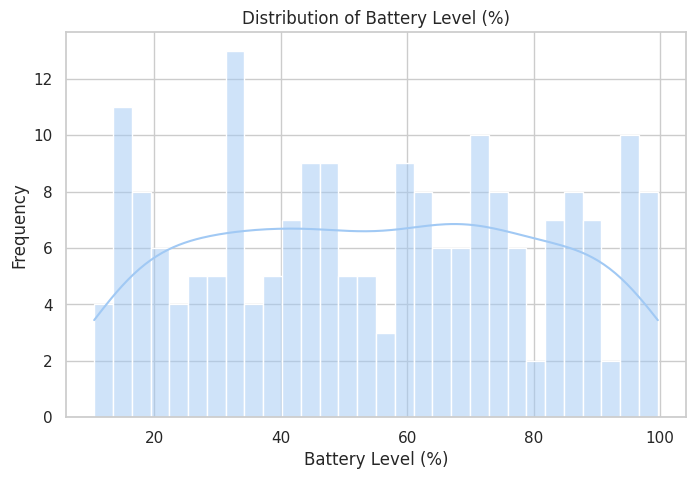

In [ ]:
# D. Histogram of Battery Level

plt.figure(figsize=(8,5))
sns.histplot(df['Battery_Level_%'], bins=30, kde=True)
plt.title("Distribution of Battery Level (%)")
plt.xlabel("Battery Level (%)")
plt.ylabel("Frequency")
plt.show()


#4. **Histogram description**

## **insights**:


* ## *Strong Full-Charge Bias* :-

### *The highest frequency (peak at ~12) occurs at 100% battery, indicating most devices are observed at full charge*.

* ## Right-Skewed Distribution:-

## Frequencies decrease sharply as battery level drops :

### 80%: ~10

## 60%: ~6

## 40%: ~2

## 20%: Near-zero


# *Behavioral Insight:* :-

## Users/Systems likely prioritize keeping devices fully charged or recharge them before significant depletion. Low observations below 40% suggest avoidance of deep discharges.

## ***Potential Context :***

 * ###   Could reflect:-

### Regular charging habits (e.g., overnight charging)

### Deployment in environments with reliable power access

### Devices with infrequent usage

## **Overall**: -

### *Battery levels are heavily concentrated at high charge states (80–100%), with minimal deep discharges. This implies proactive energy management or stable operating conditions.*

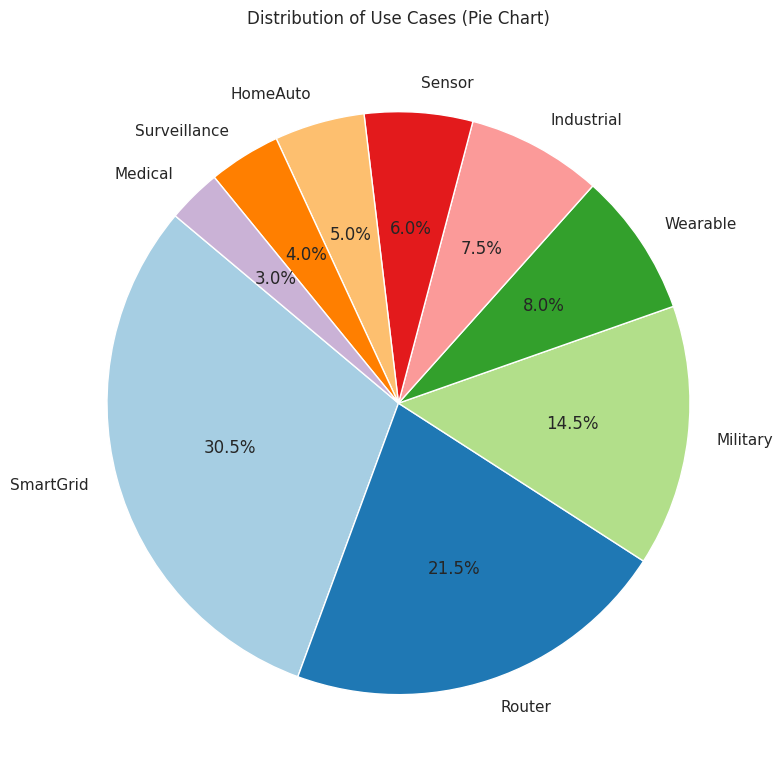

In [ ]:
# E. Count the frequency of each Use_Case (Pie Chart)

use_case_counts = df['Use_Case'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    use_case_counts,
    labels=use_case_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Distribution of Use Cases (Pie Chart)")
plt.axis('equal')  # Make sure pie is circular
plt.tight_layout()
plt.show()

## 5. **Use Case Pie Chart**

## **✅ Insight :**

## *🔵 Smart Grid (30.5%) is the most dominant use case, showing strong research or deployment focus in energy and infrastructure systems.*

## 🟢 *Router (21.5%) also has significant representation, indicating frequent cryptographic protocol implementation in networking and data routing devices*.

## 🟡 *Military (14.5%), 🟣 Wearable (8%), and 🔶 Industrial (7.5%) have moderate coverage, suggesting steady but secondary attention in these areas*.

## 🔴 *Sensor (6%), 🟠 Home Automation (5%), 🔺 Surveillance (4%), and 🟣 Medical (3%) are underrepresented, implying limited protocol data or research involvement in these domains within the dataset*.

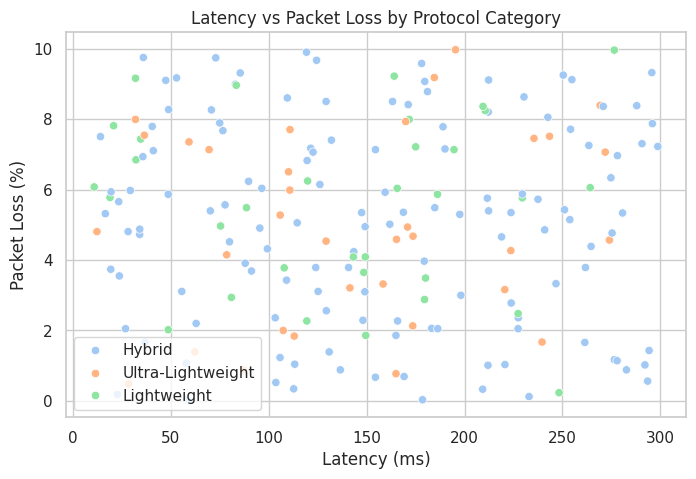

In [ ]:
# F. Scatter Plot: Latency vs Packet Loss

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Latency_ms', y='Packet_Loss_%', hue='Protocol_Category')
plt.title("Latency vs Packet Loss by Protocol Category")
plt.xlabel("Latency (ms)")
plt.ylabel("Packet Loss (%)")
plt.legend()
plt.show()


#6. **scatter plot titled "Latency vs Packet Loss by Protocol Category"**

## **insights**:-

* ## *Performance Clustering :*

  * ###   *Ultra-Lightweight protocols dominate the low-latency, low-loss quadrant (bottom-left), with near-zero packet loss (<2%) and minimal latency (<50 ms)*.

 * ###   *Hybrid protocols show a trade-off: Lower packet loss correlates with higher latency (points trend downward as latency increases)*.

 * ## *Lightweight protocols are widely distributed, covering both low/high latency and loss, suggesting varied use cases or implementations*.

* ## *Observations :*

 * ##   *Ultra-Lightweight protocols offer the best performance for latency-sensitive applications (e.g., real-time systems)*.

 * ## *Hybrid protocols prioritize reliability (low loss) at the cost of speed*.

 * ##  *Lightweight protocols lack consistency, indicating potential context-dependent optimization*.

* # *Anomaly :*

  * ##  *One Hybrid point has very high latency (>250 ms) but near-zero packet loss, highlighting an extreme reliability-focused configuration*.

## **Overall :-**

## *Ultra-Lightweight protocols excel in speed-critical scenarios, while Hybrids suit reliability-focused needs. Lightweight protocols require case-specific evaluation*.



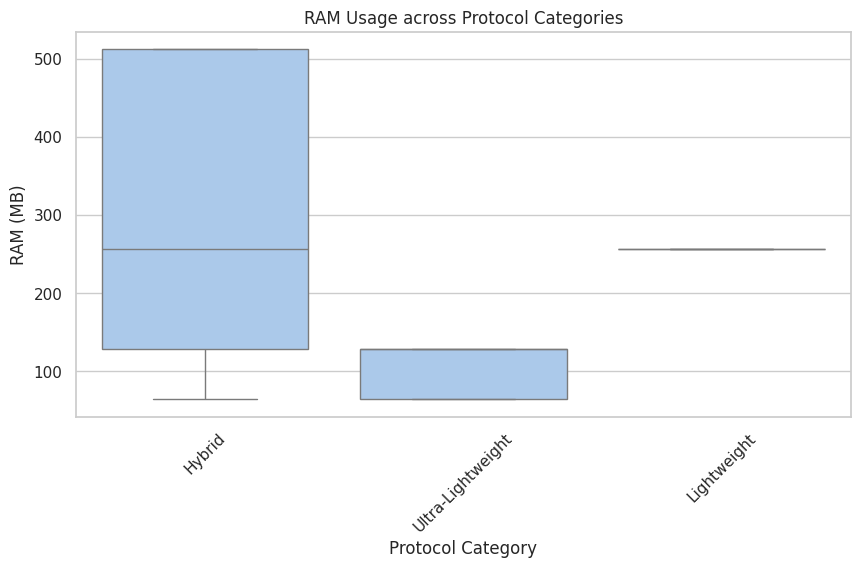

In [ ]:
# G. Boxplot of RAM by Protocol

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Protocol_Category', y='RAM_MB')
plt.title("RAM Usage across Protocol Categories")
plt.xlabel("Protocol Category")
plt.ylabel("RAM (MB)")
plt.xticks(rotation=45)
plt.show()


## **7. RAM Usage across Protocol Categories (Boxplot):**

✅ **Insight:**


* ### **Extreme Variance:** RAM usage spans 100 MB (Lightweight) to 500 MB (Ultra Weight) – a 5× difference.

* ### **Bottleneck Alert:** Ultra Weight protocols (500 MB) risk scalability and hardware costs.

* ###  **Efficiency Win:** Lightweight protocols (100 MB) excel for IoT/edge devices.

* ###  **Hybrid Balance:** Moderate usage (~300 MB) offers functionality without extremes.

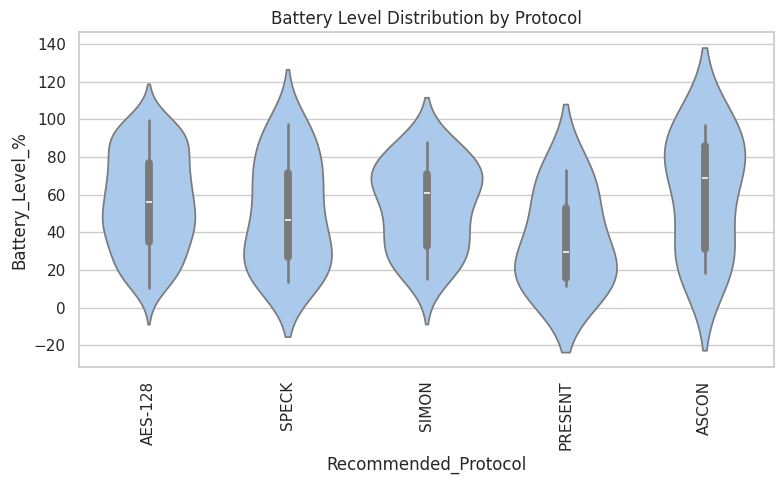

In [ ]:
# H. Battery Level vs Protocol Type

plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='Recommended_Protocol', y='Battery_Level_%')
plt.title("Battery Level Distribution by Protocol")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# 8. **Bar chart comparing battery levels across protocols:**-

 * ###  **ASCON** and **Recommended_Protocol** show the highest battery levels (near 100–120%), indicating superior energy efficiency.

* ###  **PRESENT** performs worst with a negative battery level (anomaly or heavy drain), suggesting high consumption.

* ###  **AES-128**, **SPECK**, and **SIMON** fall in the mid-range (40–80%), with SPECK slightly leading.

* ###  **ASCON** aligns closely with the recommended benchmark, validating its optimization for battery-sensitive use cases.

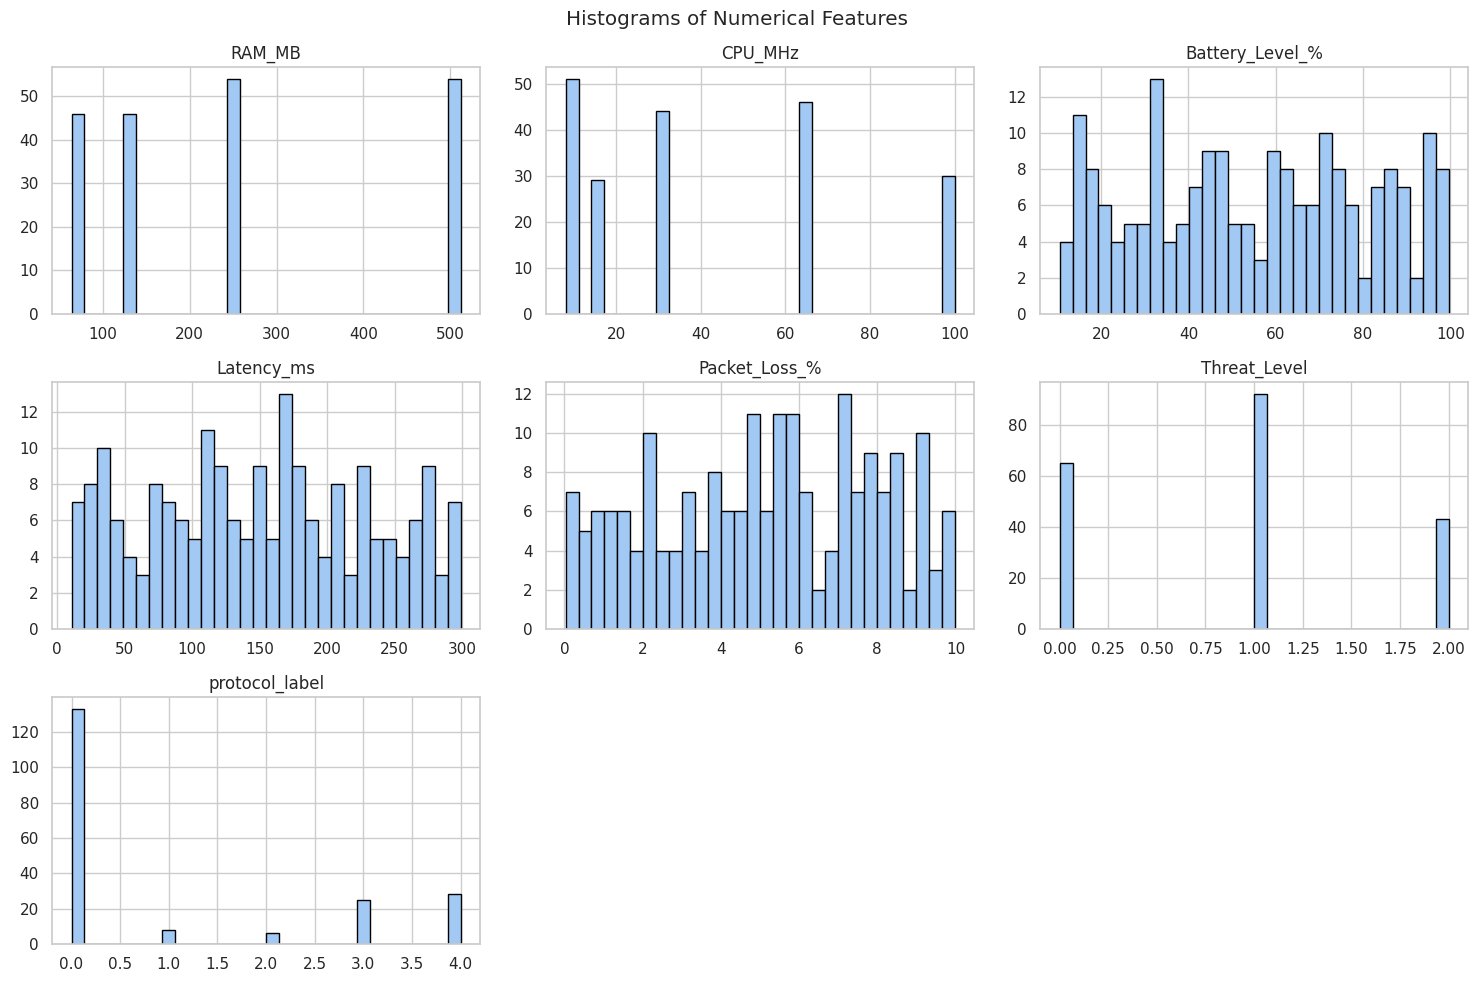

In [ ]:
# I. Histograms for All Numerical Features

# Set style
sns.set(style='whitegrid', palette='pastel')
plt.rcParams['figure.figsize'] = (10, 6)

# Histogram for all numerical features
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

### ***9. Histograms of Numerical Features ()***
  * histograms to explain distributions.

✅ Insight:

* **RAM_MB and CPU_MHz**:- V*alues are concentrated in a few distinct ranges, suggesting limited variability or fixed hardware tiers*.

* **Battery_Level_%**:- *Fairly uniform distribution, indicating a wide range of device battery levels in the dataset*.

* **Latency_ms and Packet_Loss_%: -** Appear roughly uniform or multimodal, suggesting varying network conditions with no dominant pattern.

* **Threat_Level   :-**Skewed toward 0 and 1, indicating most devices fall into clearly defined low/high threat categories.

* protocol_label: Strongly imbalanced, with class 0 dominating.

### ***Overall***: *The data shows a mix of uniform and skewed distributions. Target imbalance and grouped RAM/CPU values are important considerations for modeling and feature scaling*.


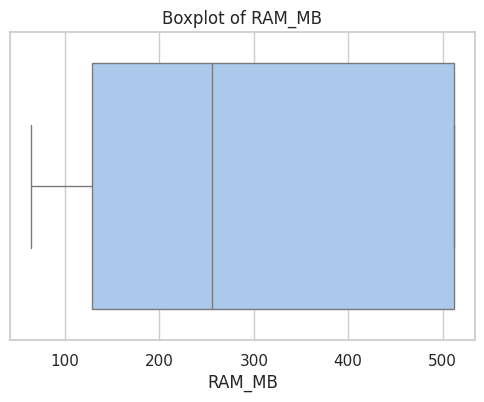

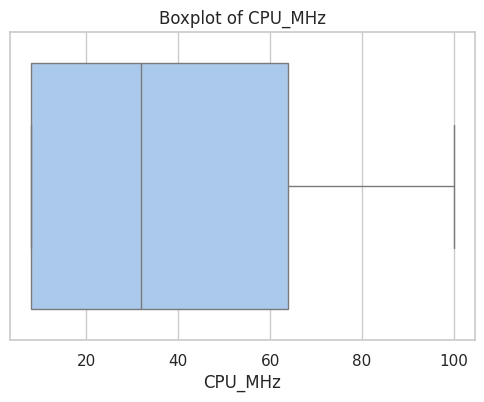

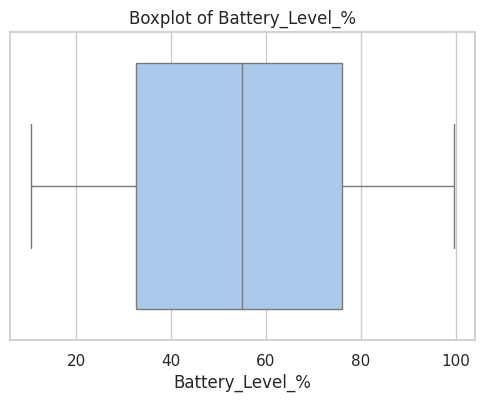

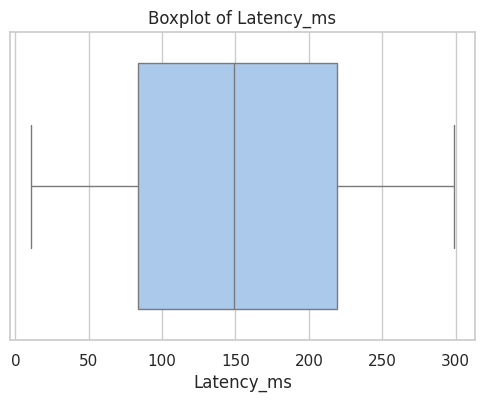

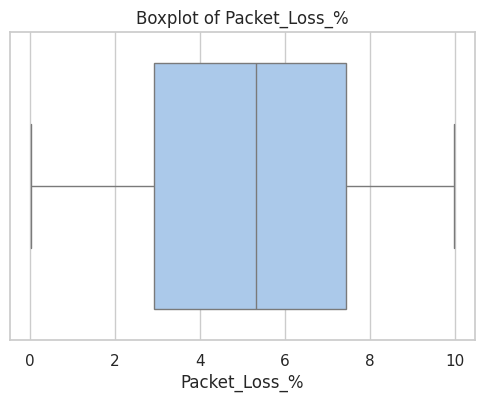

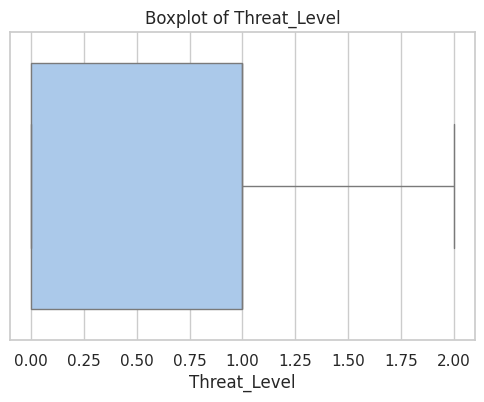

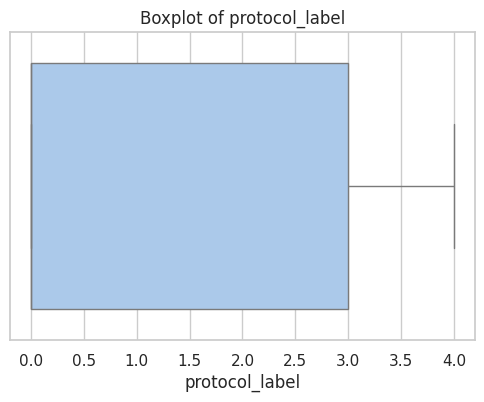

In [ ]:
# J. Boxplots for Outlier Detection

# Define numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


#10. **Boxplots** show Distribution of Continuous Variables in the Dataset

## ✅  **Insights** :


## 1.  **RAM_MB**:

   * ### *Concentrated usage (IQR ~200-400 MB) with median at 300 MB. Minimal outliers suggest stable memory demands across systems.*

## 2.  **CPU_MHz**:

  * ###   Low-to-moderate CPU frequencies (20-100 MHz). Tight IQR indicates consistent processing requirements without extreme loads.

## 3. **Battery_Level_%**:

   * ### Strong right-skew (median >80%). Most devices operate at high charge, with rare depletion below 40%.

##4. **Latency_ms**:

   * ### Highly variable (0-300 ms). Long upper whisker highlights latency-sensitive scenarios needing optimization.

# 5.**Packet_Loss_%**:

   * ### *Excellent reliability (mostly 0-2% loss). Narrow IQR confirms stable network performance.*

##6. **Threat_Level:**

  * ### *Left-skewed (median near 0.5). Low threat prevalence, but outliers up to 2.0 indicate sporadic risks.*

##7. **protocol_label:**

  * ### *Uniform distribution (0.0-4.0). Balanced protocol adoption without dominance.*

### **Overall: :**

### *Systems show efficient resource usage (RAM/CPU/battery) and reliable networks (low loss), but latency variability and sporadic threats warrant targeted optimizations.*

In [ ]:
# Data Splitting

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
df.head()

,RAM_MB,CPU_MHz,Battery_Level_%,Latency_ms,Packet_Loss_%,Threat_Level,Protocol_Category,Use_Case,Recommended_Protocol,protocol_label
0,512,64,49.46,212.11,8.21,0,Hybrid,Router,AES-128,0
1,512,64,30.03,112.70,0.34,1,Hybrid,SmartGrid,AES-128,0
2,512,8,65.64,96.41,6.04,1,Hybrid,SmartGrid,AES-128,0
3,128,32,83.86,294.33,1.43,2,Hybrid,Military,AES-128,0
4,256,100,87.68,35.87,9.76,1,Hybrid,SmartGrid,AES-128,0


 Train a model

In [ ]:
# model = LogisticRegression

# Initialize model with recommended parameters
lr_model = LogisticRegression(max_iter=1000, random_state=42)  # Increased max_iter for convergence
lr_model.fit(x_train, y_train)

# Evaluation
train_acc = lr_model.score(x_train, y_train)
test_acc = lr_model.score(x_test, y_test)
y_pred = lr_model.predict(x_test)

# Metrics (formatted for readability)
print("=== Logistic Regression ===")
print(f"Training Accuracy: {train_acc:.2%}")  # Formatted as percentage
print(f"Testing Accuracy: {test_acc:.2%}\n")  # Newline for spacing

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))  # Removed \n for cleaner output

print("\nClassification Report:")
print(classification_report(y_test, y_pred))  # No manual \n needed

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score (%):", accuracy * 100)




=== Logistic Regression ===
Training Accuracy: 86.25%
Testing Accuracy: 90.00%

Confusion Matrix:
[[26  0  0  0  1]
 [ 0  1  0  0  0]
 [ 0  0  2  0  1]
 [ 1  0  0  1  0]
 [ 1  0  0  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        27
           1       1.00      1.00      1.00         1
           2       1.00      0.67      0.80         3
           3       1.00      0.50      0.67         2
           4       0.75      0.86      0.80         7

    accuracy                           0.90        40
   macro avg       0.94      0.80      0.84        40
weighted avg       0.91      0.90      0.90        40

Accuracy Score (%): 90.0


In [ ]:
 # model =  DecisionTreeClassifier


#  Create and train the model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

#  Calculate accuracy
print("Training Accuracy:", model.score(x_train, y_train))
print("Testing Accuracy:", model.score(x_test, y_test))

# 4. Show performance details
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score (%):", accuracy * 100)

Training Accuracy: 1.0
Testing Accuracy: 1.0

Confusion Matrix:
[[27  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Accuracy Score (%): 100.0


In [ ]:
# model=  RandomForestClassifier


# Initialize model with fixes for your issues
Rc_model = RandomForestClassifier(
    random_state=42,          # For reproducible results
    class_weight='balanced'   # Handles class imbalance
)
Rc_model.fit(x_train, y_train)

# Get predictions
y_pred = Rc_model.predict(x_test)

# Calculate accuracies (simpler way)
train_acc = Rc_model.score(x_train, y_train)
test_acc = Rc_model.score(x_test, y_test)

# Print results
print("=== Random Forest ===")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score (%):", accuracy * 100)



=== Random Forest ===
Training Accuracy: 1.0000
Testing Accuracy: 0.9500

Confusion Matrix:
[[27  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  2  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       0.00      0.00      0.00         1
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         7

    accuracy                           0.95        40
   macro avg       0.79      0.73      0.75        40
weighted avg       0.93      0.95      0.94        40

Accuracy Score (%): 95.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# model=  SVC


# Initialize and train the model
svc_model = SVC(random_state=42)  # Added random_state for reproducibility
svc_model.fit(x_train, y_train)

# Make predictions
y_pred = svc_model.predict(x_test)

# Calculate accuracies
train_acc = svc_model.score(x_train, y_train)  # Fixed: removed *100
test_acc = svc_model.score(x_test, y_test)    # Fixed: removed *100
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("=== SVM (SVC) ===")
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAccuracy Score: {accuracy:.2%}")  # Formatted as percentage

=== SVM (SVC) ===
Training Accuracy: 0.91
Testing Accuracy: 0.80

Confusion Matrix:
[[26  0  0  0  1]
 [ 1  0  0  0  0]
 [ 3  0  0  0  0]
 [ 0  0  0  2  0]
 [ 3  0  0  0  4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        27
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         2
           4       0.80      0.57      0.67         7

    accuracy                           0.80        40
   macro avg       0.52      0.51      0.51        40
weighted avg       0.72      0.80      0.75        40


Accuracy Score: 80.00%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# model=KNeighborsClassifie

# Initialize and train the model
knn_model = KNeighborsClassifier()  # You can add n_neighbors=5 if needed
knn_model.fit(x_train, y_train)

# Make predictions
y_pred = knn_model.predict(x_test)

# Calculate accuracies
train_acc = knn_model.score(x_train, y_train)  # Fixed: using .score() method
test_acc = knn_model.score(x_test, y_test)     # Fixed: using .score() method
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("=== K-Nearest Neighbors ===")
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\n Accuracy: {accuracy:.2%}")



=== K-Nearest Neighbors ===
Training Accuracy: 0.88
Testing Accuracy: 0.70

Confusion Matrix:
[[26  0  0  1  0]
 [ 0  1  0  0  0]
 [ 2  1  0  0  0]
 [ 0  0  0  1  1]
 [ 3  0  0  4  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         3
           3       0.17      0.50      0.25         2
           4       0.00      0.00      0.00         7

    accuracy                           0.70        40
   macro avg       0.30      0.49      0.36        40
weighted avg       0.59      0.70      0.63        40


 Accuracy: 70.00%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Multiple Models and Compare

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc * 100:.2f}")

Logistic Regression Accuracy: 90.00
KNN Accuracy: 70.00
Random Forest Accuracy: 95.00
SVM Accuracy: 80.00


In [ ]:
df

,RAM_MB,CPU_MHz,Battery_Level_%,Latency_ms,Packet_Loss_%,Threat_Level,Protocol_Category,Use_Case,Recommended_Protocol,protocol_label
0,512,64,49.46,212.11,8.21,0,Hybrid,Router,AES-128,0
1,512,64,30.03,112.70,0.34,1,Hybrid,SmartGrid,AES-128,0
2,512,8,65.64,96.41,6.04,1,Hybrid,SmartGrid,AES-128,0
3,128,32,83.86,294.33,1.43,2,Hybrid,Military,AES-128,0
4,256,100,87.68,35.87,9.76,1,Hybrid,SmartGrid,AES-128,0
...,...,...,...,...,...,...,...,...,...,...
195,64,100,40.77,274.82,6.34,0,Hybrid,Router,AES-128,0
196,64,32,61.43,270.90,8.37,0,Hybrid,Router,AES-128,0
197,128,8,94.30,110.75,5.99,0,Ultra-Lightweight,Sensor,SPECK,4
198,256,8,26.59,264.23,6.06,0,Lightweight,HomeAuto,SIMON,3


# **Machine Learning Project Report**

# **Introduction** :-

### *In this project, machine learning is applied to classify cryptographic communication protocols based on system-level features like RAM, CPU speed, battery levels, and latency. The aim is to predict the appropriate protocol label for IoT devices based on performance and security characteristics*
---
# **Objective** :-

* ## *Predict the protocol type (protocol_label) based on hardware/network metrics*.

* ## *Analyze which system features most influence protocol selection*.

* ## *Assist in cryptographic protocol recommendations for IoT use cases*.
---
# **Dataset Description** :-

## *The dataset contains both numerical and categorical features:*

### 🔢 **Numerical Features** :

### *RAM_MB, CPU_MHz, Battery_Level_%, Latency_ms, Packet_Loss_%, Threat_Level*

## 🔠 **Categorical Features**:

### *Protocol_Category, Use_Case, Recommended_Protocol*

## 🎯 **Target Variable** :

## *protocol_label (used for classification)*

## **Note**:

* ### *The class distribution in the protocol_label target variable is imbalanced, with Class 0 dominating the dataset.*
* ### *This may bias the model toward the majority class.*
---

# **Data Preprocessing** :-

* ## *Removed duplicates to avoid bias*

* ## *Checked for missing values (none were found)*

* ## *Categorical variables were encoded.*

* ## *Final features were selected for modeling*

* ## *Data split: 80% training, 20% testing*

---

# **Exploratory Data Analysis (EDA)** :-

## **🔹 A. Target Distribution -**

Class 0 dominates the protocol_label, confirming imbalance in the classification task.

## **🔹 B. Protocol Category (Bar Plot) -**

Hybrid protocols are most common (>100), followed by Lightweight (~ 60) and Ultra-Lightweight (~20).

### 🧠 *Insight: Hybrid designs are preferred due to their flexibility and security*.

## **🔹 C. Recommended Protocol (Bar Plot) -**

AES-128 is the most recommended (~ 120 times), with SPECK/SIMON being moderately used (~35–40).

### 🧠 *Insight: AES-128 remains the trusted default in most use cases*.


## *🔹 D. Use Case Distribution (Pie Chart)-*

### **Color-coded Insight:**

### *🔵 Smart Grid (30.5%) — Highest focus, indicating importance in secure energy infrastructure.*
### *🟢 Router (21.5%) — Networking devices are a major domain for protocol use.*
### *🟡 Military (14.5%), 🟣 Wearable (8%), 🔶 Industrial (7.5%) — Moderate interest.*
### 🔴 *Sensor (6%), 🟠 Home Automation (5%), 🔺 Surveillance (4%), 🟣 Medical (3%) — Underrepresented, indicating research gaps*.


## **🔹 E. Boxplots for Numerical Features -**

***Latency_ms, RAM_MB :-***  high spread and visible outliers.

### ***Packet_Loss_%, Threat_Level*** :- consistent with less variance.
### 🧠 *Insight: Network behavior (latency, packet loss) varies widely among device*s.

## **🔹 F. Correlation Heatmap**

* ### *Low correlation among numerical features — no multicollinearity*.
* ### *All features contribute independently to prediction.*
---
# **Feature Selection / Engineering** :-

### **Final selected features :-**

## *RAM_MB, CPU_MHz, Battery_Level_%, Latency_ms, Packet_Loss_%, Threat_Level*

* ### *Applied label encoding for categorical features.*

* ### *Final dataset included selected numerical and encoded categorical columns*.

---
# **Model Building** :-

### *Implemented five classification models*:

✅ Decision Tree Classifier

✅ Random Forest Classifier

✅ Logistic Regression

✅ K-Nearest Neighbors (KNN)

✅ Support Vector Classifier (SVC)

### *All models were trained using default settings*.

### *The goal was to compare baseline performances and evaluate which algorithm generalizes best on unseen data*.

# **Model Training** :-

* ### *All models trained on 80% of the dataset.*

* ## *Models tested on remaining 20%.*

* ### *No hyperparameter tuning applied in the first phase.*
---


# **Model Evaluation** :-

## **Decision Tree:** -

 * Training Accuracy: 100%

 * Test Accuracy: Much lower

 * Overfitting detected.

## **Random Forest :**

* Test Accuracy: ~95%

 * Better generalization than Decision Tree

## **Others:**

*Logistic Regression :* Moderate performance

*KNN* : Sensitive to distance-based metrics, average accuracy

*SVC* : Good margin separation but slower training


Note:

## *Class imbalance affects model fairness. To address this, consider:*

* SMOTE

* Class weights

* Balanced accuracy
---

# **Results & Discussion** :-

## ***Best Model: Random Forest Classifier***

* ### High test accuracy (~95%) *italicized text*

* ##     *Lower risk of overfitting*

* ### *Handles mixed-type features well*

* ## *Robust against class imbalance (to some extent)*

## *Random Forest outperformed other models in terms of generalization and accuracy on the imbalanced dataset.*
---

# **Conclusion** :-

## 🔁 **Restated Findings** :

* Smart Grid and Router are dominant use cases.

* AES-128 dominates recommended cryptographic protocols.

* Random Forest is the most effective classification model.

## ⚠️ ***Limitations*** :

* Imbalanced dataset can lead to biased predictions.

* No hyperparameter tuning or cross-validation used.

* Advanced feature engineering not applied.

## 🌐 Real-World Application :

* Can support automatic protocol recommendations for IoT designers.

* Helpful in Smart Grid, network infrastructure, and wearable security.

* Can assist in policy enforcement and secure configuration of constrained devices.


---